# Prodigy Infotech Task - 2

# by: Deepank Tyagi

# Task : Create a k-means clustering algorithm to group customers of a retail store based on their purchase history

# 1. Importing Libraries

In [168]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Importing Data

In [169]:
df=pd.read_csv("Mall_Customers.csv")

# 3. Data Preprocessing and Analysis

In [170]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [171]:
df.shape

(200, 5)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [173]:
df.size

1000

In [174]:
del df["CustomerID"]

In [175]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [176]:
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [177]:
df.duplicated().sum()

0

In [178]:
df.nunique()

Gender                     2
Age                       51
Annual Income (k$)        64
Spending Score (1-100)    84
dtype: int64

In [179]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [180]:
df.rename(columns={"Annual Income (k$)": "Income","Spending Score (1-100)":"Score"},inplace=True)

# 4. Data Visualization

In [181]:
df.Gender.value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

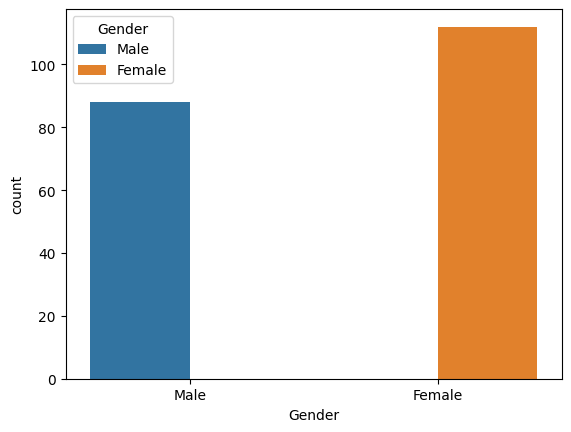

In [182]:
sns.countplot(x="Gender",data=df,hue="Gender")

In [183]:
df.groupby(by="Gender")["Gender"].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

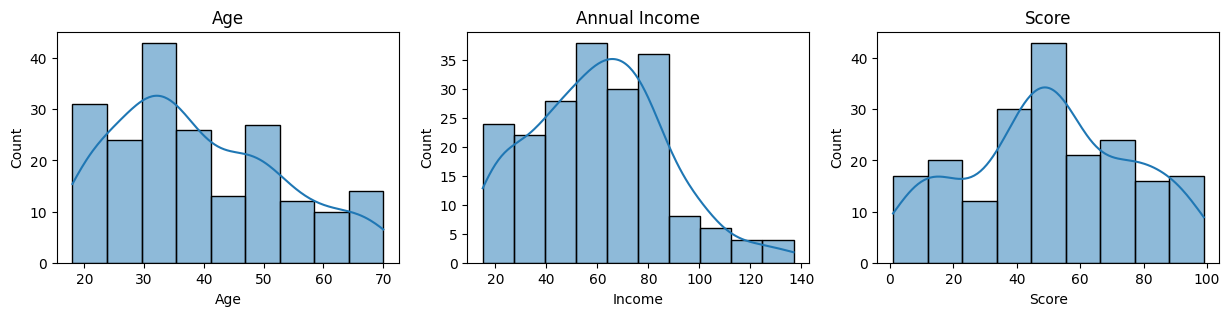

In [184]:
plt.figure(figsize = (15,3))
plt.subplot(1,3,1)

sns.histplot(df.Age, kde = True)
plt.title("Age")
plt.xlabel("Age");


plt.subplot(1,3,2)
sns.histplot(df["Income"], kde = True)
plt.title("Annual Income")
plt.xlabel("Income");

plt.subplot(1, 3, 3)
sns.histplot(df["Score"], kde = True)
plt.title("Score")
plt.xlabel("Score");

<Axes: >

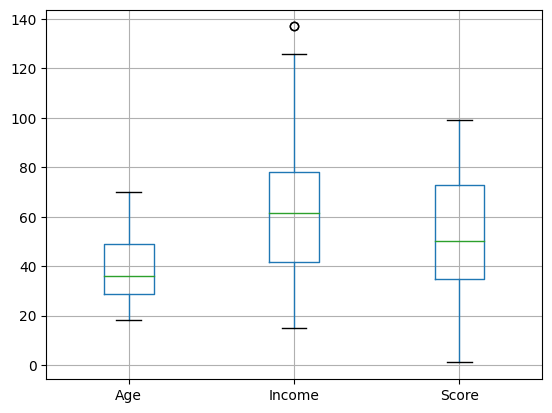

In [185]:
df.iloc[:,:].boxplot()

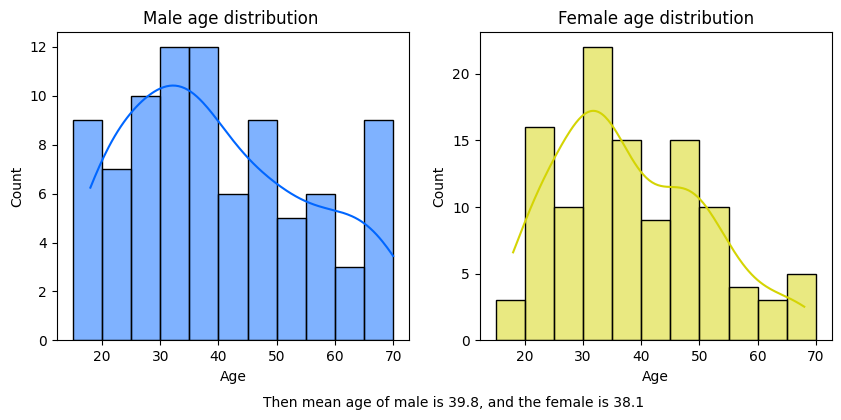

In [186]:
# Distribution of age with respect to gender
male = df[df.Gender == "Male"]["Age"]
female = df[df.Gender != "Male"]['Age']

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.histplot(male, color='#0066ff', bins = range(15,75,5), kde = True)
plt.title("Male age distribution ")

plt.subplot(1,2,2)
sns.histplot(female, color = '#D4D404', bins = range(15,75,5), kde = True)
plt.title("Female age distribution");
plt.text(-25,-5,f"Then mean age of male is {round(male.mean(),1)}, and the female is {round(female.mean(),1)}")

plt.show()

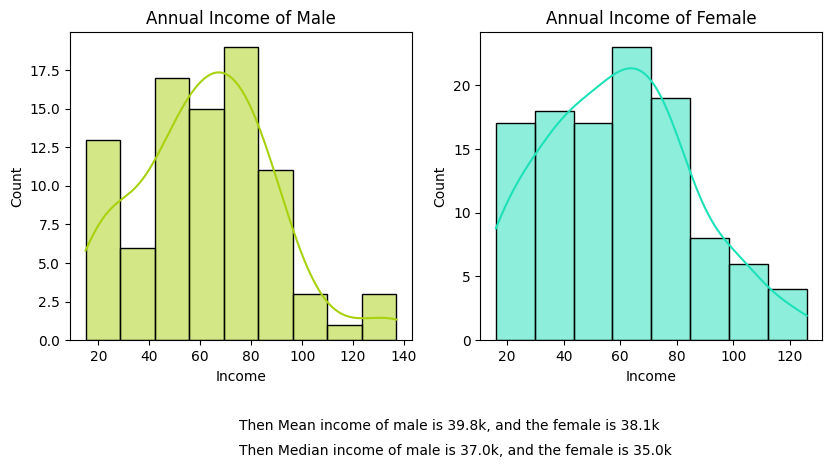

In [187]:
income_male = df[df.Gender == "Male"]["Income"]
income_female = df[df.Gender != "Male"]["Income"]

plt.figure(figsize = (15, 4))
plt.subplot(1,3,1)
sns.histplot(income_male, color = '#A8D10E',kde=True)
plt.title("Annual Income of Male")
plt.xlabel("Income")

plt.subplot(1,3,2)
sns.histplot(income_female, color = '#1DE1B8',kde=True)
plt.title("Annual Income of Female")
plt.xlabel("Income")
plt.text(-75,-7,f"Then Mean income of male is {round(male.mean(),1)}k, and the female is {round(female.mean(),1)}k")
plt.text(-75,-9,f"Then Median income of male is {round(male.median(),1)}k, and the female is {round(female.median(),1)}k")
plt.show()

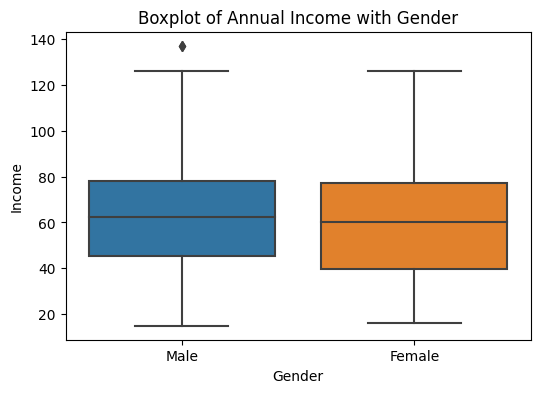

In [188]:
plt.figure(figsize = (6,4))
sns.boxplot(x = 'Gender', y = "Income", data = df)
plt.title("Boxplot of Annual Income with Gender")
plt.show()

In [189]:
data_short=df[['Score', 'Income']]

<Axes: xlabel='Income', ylabel='Score'>

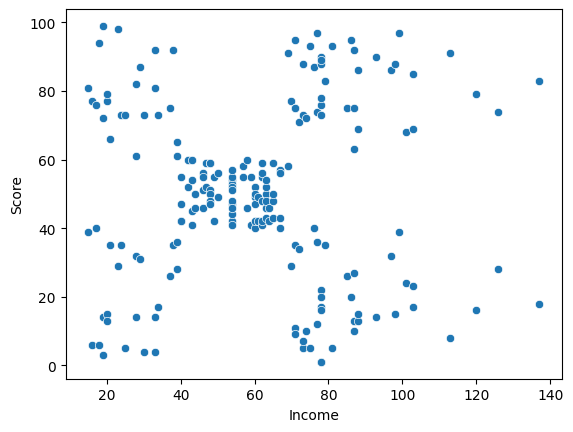

In [190]:
sns.scatterplot(x=df.Income,y=df.Score)                # scatterplot between Annual Income and Spending Score

# 5. Finding Optimal Number of Clusters and Model Training

In [191]:
from sklearn.cluster import KMeans

In [192]:
wss=[]                 # Using Elbow method to find the optimal number of clusters
for k in range(1,12):
    kmeans=KMeans(n_clusters=k,n_init="auto")
    kmeans=kmeans.fit(data_short)
    wss.append(kmeans.inertia_)

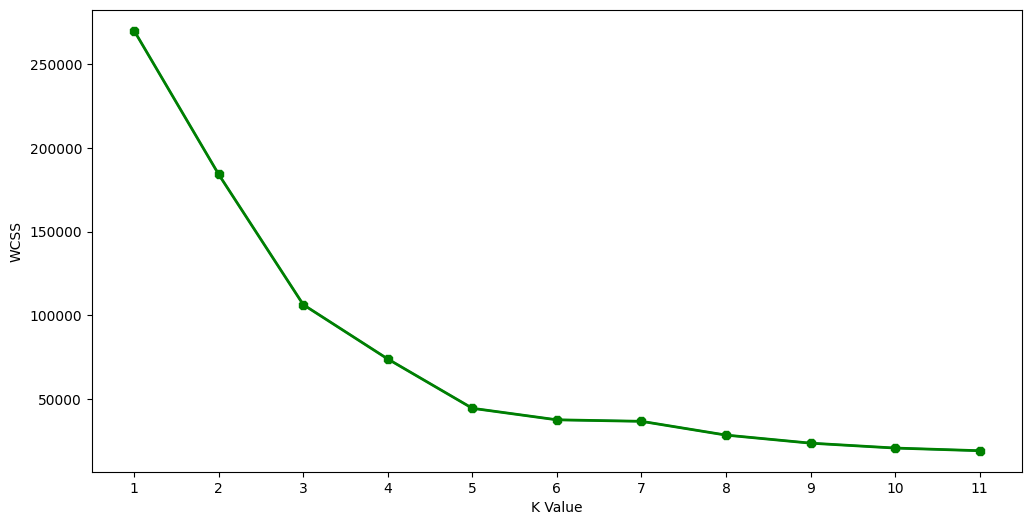

In [193]:
plt.figure(figsize=(12,6))        # Elbow Graph Visualization
plt.plot(range(1,12),wss)
plt.plot(range(1,12),wss,linewidth=2,color='green',marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,12))
plt.ylabel("WCSS")
plt.show()

In [194]:
# taking centroids to be 5
model=KMeans(n_clusters=5)
model.fit(data_short)
predictions=model.predict(data_short)
df["Predicted"]=predictions
df.head()


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Gender,Age,Income,Score,Predicted
0,Male,19,15,39,4
1,Male,21,15,81,0
2,Female,20,16,6,4
3,Female,23,16,77,0
4,Female,31,17,40,4


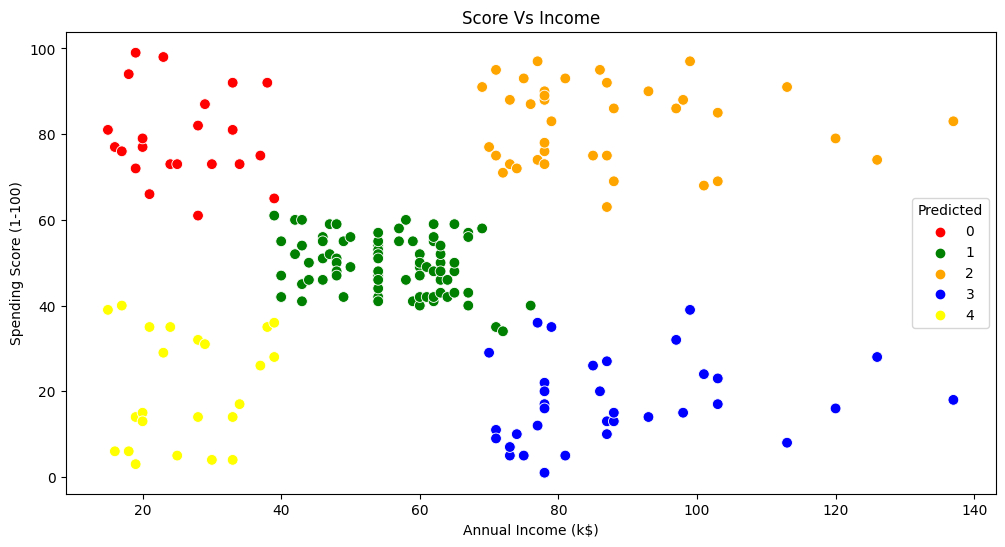

In [197]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="Income",y="Score",hue="Predicted",palette=["red","green","orange","blue","yellow"],legend="full",data=df,s=60)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Score Vs Income")
plt.show()